In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from env import user, password, host
from sqlalchemy import create_engine

In [2]:
%matplotlib inline

In [6]:
def get_db_url(user,pw,host,db):
    return 'mysql+pymysql://{}:{}@{}/{}'.format(user, pw, host,db)

In [13]:
url = get_db_url(user,password,host,'iris_db')

In [14]:
dbc = create_engine(url)

In [17]:
pd.read_sql('SHOW TABLES',dbc)

,Tables_in_iris_db
0,measurements
1,species


In [18]:
m_df = pd.read_sql('SELECT * FROM measurements',dbc)

In [23]:
s_df = pd.read_sql('SELECT * FROM species',dbc)

In [22]:
m_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
measurement_id    150 non-null int64
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_id        150 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.1 KB


In [24]:
s_df

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [40]:
m_df.sample(5)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
75,76,6.6,3.0,4.4,1.4,2
137,138,6.4,3.1,5.5,1.8,3
99,100,5.7,2.8,4.1,1.3,2
44,45,5.1,3.8,1.9,0.4,1
84,85,5.4,3.0,4.5,1.5,2


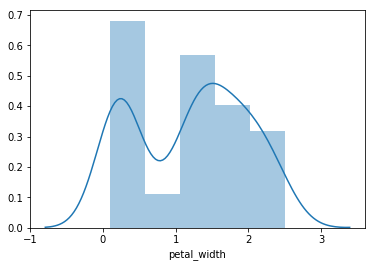

In [38]:
sns.distplot(m_df['petal_width'] )

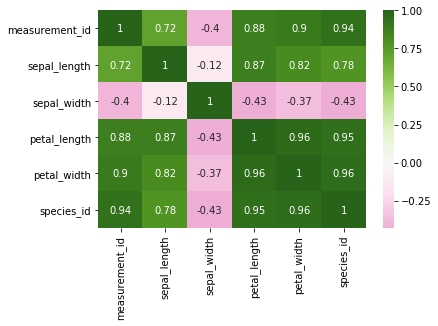

In [39]:
from matplotlib import cm
sns.heatmap(m_df.corr(), cmap=cm.PiYG, annot=True, center=0)

In [46]:
ans_df = sns.load_dataset('anscombe')

In [55]:
ans_df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


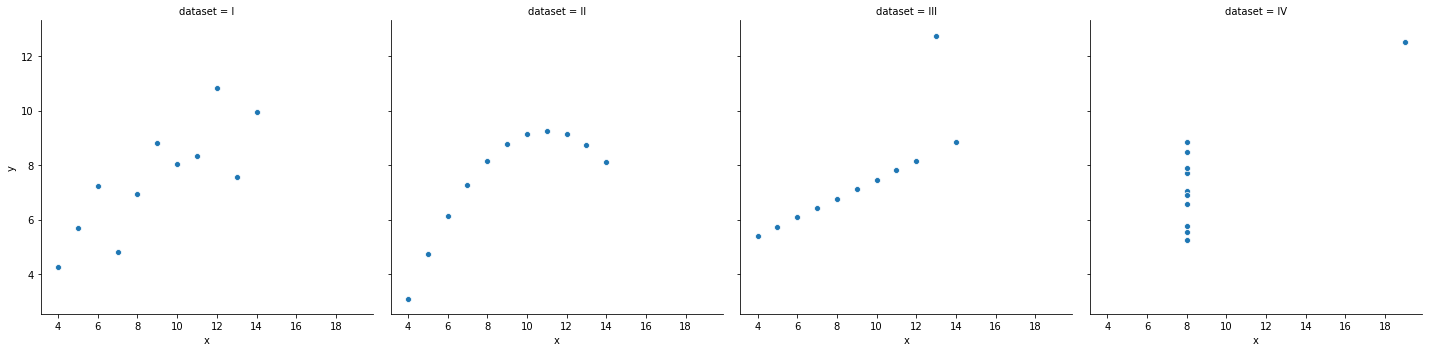

In [61]:
sns.relplot(data=ans_df,y='y',x='x', col='dataset')

In [71]:
from pydataset import data

In [85]:
data('InsectSprays',show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [86]:
sprays_df = data('InsectSprays')

In [87]:
sprays_df.sample(5)

,count,spray
68,10,F
6,12,A
43,5,D
11,14,A
2,7,A


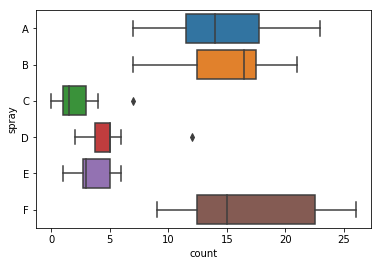

In [100]:
sns.boxplot(data=sprays_df, x = 'count', y='spray')

In [101]:
swiss_df = data('swiss')

In [103]:
type(swiss_df)

pandas.core.frame.DataFrame

In [104]:
swiss_df.tail()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Val de Ruz,77.6,37.6,15,7,4.97,20.0
ValdeTravers,67.6,18.7,25,7,8.65,19.5
V. De Geneve,35.0,1.2,37,53,42.34,18.0
Rive Droite,44.7,46.6,16,29,50.43,18.2
Rive Gauche,42.8,27.7,22,29,58.33,19.3


In [116]:
swiss_df['is_cath'] = swiss_df.Catholic.apply(lambda cath: True if cath > 40 else False)



In [117]:
swiss_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 7 columns):
Fertility           47 non-null float64
Agriculture         47 non-null float64
Examination         47 non-null int64
Education           47 non-null int64
Catholic            47 non-null float64
Infant.Mortality    47 non-null float64
is_cath             47 non-null bool
dtypes: bool(1), float64(4), int64(2)
memory usage: 3.9+ KB


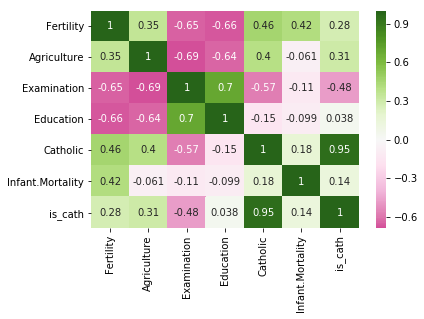

In [118]:
sns.heatmap(swiss_df.corr(), cmap=cm.PiYG, annot=True, center=0)

In [122]:
url = get_db_url(user,password,host,'chipotle')

In [123]:
dbc = create_engine(url)

In [124]:
pd.read_sql('SHOW TABLES',dbc)

,Tables_in_chipotle
0,orders


In [125]:
chip_df = pd.read_sql('SELECT * FROM orders',dbc)

In [126]:
chip_df.tail()

,id,order_id,quantity,item_name,choice_description,item_price
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75
4621,4622,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Lettuce]]",$8.75


In [147]:
pop_items = list(chip_df.groupby('item_name').count().nlargest(4,'id').T)

In [156]:
chip_df['item_price'] = chip_df['item_price'].str.replace('$','').astype('float')

In [157]:
chip_df.tail()

,id,order_id,quantity,item_name,choice_description,item_price
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75
4621,4622,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Lettuce]]",8.75


In [167]:
chip_df[[chip_df['item_name'] in pop_items]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().